# Notes on Unsteady Lifting Line Theory using the Discrete Vortex Method

### Quasi steady correction - A circulation correction to the collected 2D solutions along the span is made at every time step, as if the 2D solutions are steady. 

##### Let the circulation distribution along span be given by:


$$ \Gamma = 4sU_{ref} \Sigma_{n=1}^{\infty} B_n \sin n \psi $$

##### The differential of circulation which goes in the wake is give by:

$$ d\Gamma = 4sU_{ref} \Sigma nB_n \cos n \psi $$

##### The downwash due to this differential which acts as a semi-infinite votex line (quasi-steady assumption) is:

$$ w_i = U_{ref} \Sigma \frac{nB_n \sin n \psi}{\sin \psi}$$

##### The downwash for the 2D strips is affected by this contribution as:

$$ W_{additional}(\theta,t) = -U_{ref}  \Sigma \frac{nB_n \sin n \psi}{\sin \psi}$$

##### The effect of this downwash on the Fourier coefficients of the 2D solutions:

$$ A_{0_{3D}} = -\frac{1}{\pi}\int_0^\pi  \Sigma \frac{nB_n \sin n \psi}{\sin \psi} = - \Sigma \frac{nB_n \sin n \psi}{\sin \psi} $$

$$ A_{1_{3D}} = \frac{2}{\pi}\int_0^\pi  \Sigma \frac{nB_n \sin n \psi}{\sin \psi} \cos \theta d\theta = 0$$

$$ A_{2_{3D}} =  A_{n_{3D}} = 0 $$

##### The $B_n$ coefficients are solved for as follows:


$$ 4sU_{ref} \Sigma_{n=1}^{\infty} B_n \sin n \psi = U_{ref}c\pi (A_{0_{2D}} + A_{0_{3D}} + A_{1_{2D}})$$

##### This simplifies to the following matrix equation:


$$ \Sigma B_n \sin n \psi \left(\sin \psi + \frac{c\pi n}{4s} \right) = \frac{c \pi \sin \psi}{4s} \left(A_{0_{2D}} + \frac{A_{1_{2D}}}{2} \right) $$

##### Take values of $\psi$ from $(-\pi,\pi)$ 

##### Each row -> Spanwise station, Each column -> Value of n

##### If all sections along the span are undergoing the same kinematics

##### Additional contribution to circulatory force:


$$ F_{N_{c}} = 2s \left( \left(A_{0_{2D}} + \frac{A_{1_{2D}}}{2} \right) - B_1 - B_3 - B_5 - ..... \right) $$   

##### Additional contribution to noncirculatory force:


$$ F_{N_{nc}} = 2s \left( \left(\frac{3}{4}\dot{A}_{0_{2D}} + \frac{1}{4}\dot{A}_{1_{2D}} + \frac{1}{8}\dot{A}_{2_{2D}} \right) - \dot{B}_1 - \dot{B}_3 - \dot{B}_5 - ..... \right) $$   

##### Discretisation:

$$ y = -s \cos \psi $$
$$ dy = s \sin \psi d \psi $$
$$ \Delta y = s \sin \psi \Delta \psi $$

##### If sections along the span are undergoing different kinematics

$$ C_{N_{c}}(y) =  2 \pi \left( A_{0_{2D}}(y) + A_{0_{3D}}(y) + \frac{1}{2}A_{1_{2D}}(y)\right) $$

$$ C_{N_{nc}}(y) =  2 \pi \frac{c}{U_{ref}}  \left(\frac{3}{4}\dot{A}_{0_{2D}}(y) + \frac{3}{4}\dot{A}_{0_{3D}}(y) + \frac{1}{4}\dot{A}_{1_{2D}}(y) + \frac{1}{8}\dot{A}_{2_{2D}}(y) \right) $$

$$ C_{N_{3D}}(y) =  C_{N_{c}}(y) +  C_{N_{nc}}(y) $$

$$ C_{S_{3D}}(y) = 2 \pi (A_{0_{2D}}(y)^2 + A_{0_{3D}}(y)^2) $$

$$ C_{N_{wing}} = \frac {\Sigma C_{N_{3D}}(y) \Delta y}{2s} = \frac{1}{2} \Sigma C_{N_{3D}}(y)\sin \psi(y) \Delta \psi $$

$$ C_{S_{wing}} = \frac{1}{2} C_{S_{3D}}(y) \sin \psi(y) \Delta \psi $$

##### Example and code cleanup of 3D correction for a wing undergoing the same spanwise kinematics

In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35
  likely near /home/kiran/.julia/v0.5/IJulia/src/kernel.jl:35


##### The pitch-ramp up case from Kenneth Granlund's paper. First run 2D and convert results to 3D

In [62]:
alphadef = EldUpDef(45*pi/180,pi/8,0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #leading edge

surf = TwoDSurf("FlatPlate", pvt,full_kinem)

curfield = TwoDFlowField()

dtstar = 0.015*0.2/(pi/8)
nsteps =round(Int,2.5/dtstar)+1

328

In [63]:
mat2d, surf2d, curfield2d = ldvm_more(surf, curfield, nsteps,dtstar)

(
[0.00763944 7.3952e-13 0.0 1.0 4.85886e-6 1.12701e-5 -1.48337e-10 -4.5733e-7 1.79335e-6 1.12701e-5 1.48337e-10; 0.0152789 8.92841e-13 0.0 1.0 4.85886e-6 -0.001404 -1.48338e-10 0.000650962 1.79335e-6 -0.001404 1.48337e-10; 0.0229183 1.07814e-12 0.0 1.0 4.85886e-6 -0.001404 -1.48338e-10 0.000650962 1.79335e-6 -0.001404 1.48337e-10; 0.0305577 1.30168e-12 0.0 1.0 4.85886e-6 -0.001404 -1.48338e-10 0.000650962 1.79335e-6 -0.001404 1.48337e-10; 0.0381972 1.57169e-12 0.0 1.0 4.85886e-6 -0.001404 -1.48339e-10 0.000650961 1.79335e-6 -0.001404 1.48337e-10; 0.0458366 1.89776e-12 0.0 1.0 4.85886e-6 -0.001404 -1.48339e-10 0.000650961 1.79335e-6 -0.001404 1.48337e-10; 0.0534761 2.2915e-12 0.0 1.0 4.85886e-6 -0.001404 -1.4834e-10 0.000650961 1.79335e-6 -0.001404 1.48337e-10; 0.0611155 2.76684e-12 0.0 1.0 4.85886e-6 -0.001404 -1.48341e-10 0.000650961 1.79335e-6 -0.001404 1.48337e-10; 0.0687549 3.34061e-12 0.0 1.0 4.85886e-6 -0.001404 -1.48341e-10 0.000650961 1.79335e-6 -0.001404 1.48337e-10; 0.076394

In [67]:
n_span = 12
n_bterm = 40
u = surf2d.uref
c = surf2d.c
psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

for i = 1:n_span
    push!(W_mat, mat2d)
    push!(W_surf, surf2d)
    push!(W_curfield, curfield2d)
end

AR = 2

lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] =  0# a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 0
for i = 1:nsteps
    for j = 1:n_span
        W_alpha[i,j] = W_mat[j][i,2]
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

#This is causing huge spikes just now 
#a0dot3d = zeros(nsteps,n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] - (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[i,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

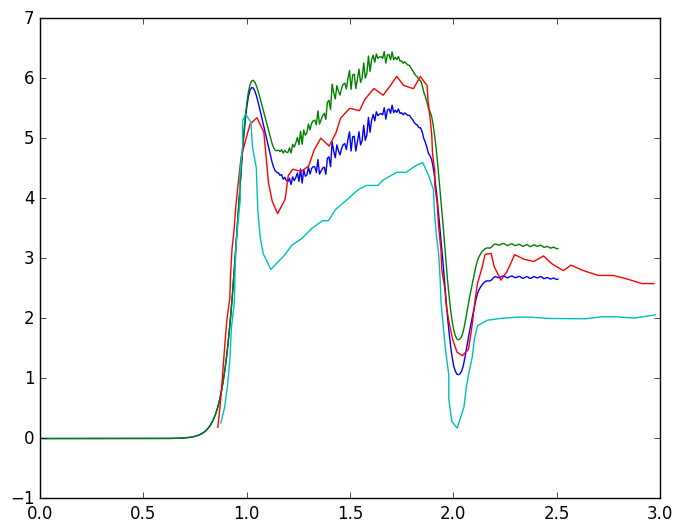

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89ec2350d0>

In [69]:
plot(W_mat[1][:,1],W_cl)
plot(mat2d[:,1],mat2d[:,6])
k_2d = readcsv("../test/PR_2D.csv")
plot(k_2d[:,1]+1,k_2d[:,2])
k_AR4 = readcsv("../test/PR_AR2.csv")
plot(k_AR4[:,1]+1,k_AR4[:,2])

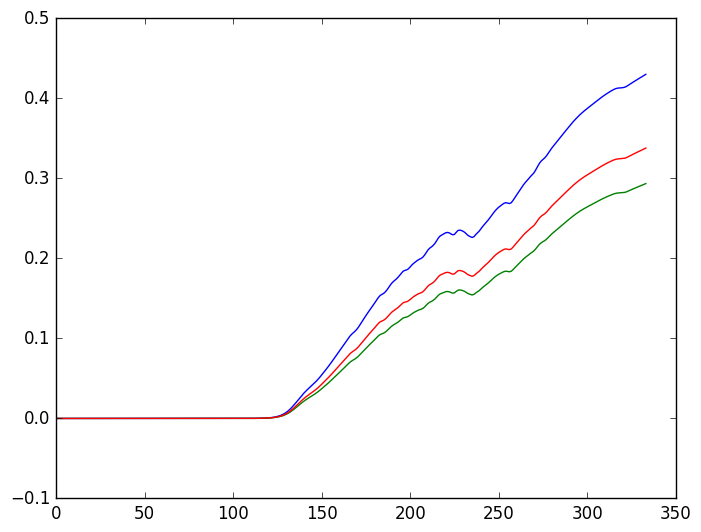

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89ec762950>

In [36]:
plot(a03d[:,1])
plot(a03d[:,5])
plot(a03d[:,10])